<a href="https://colab.research.google.com/github/Mayank01/EVA/blob/master/Session3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

###Importing main weapons of Keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

###Loading the MNIST DataSet

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Analysing DataSet/Visualizing

(60000, 28, 28)


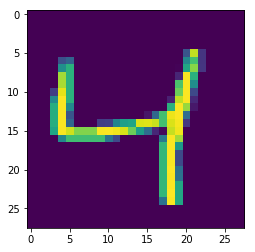

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

### Re-arranging of training and test data of input image 28*28

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###1. Normalizing the data
###2. casting of test, training data to float
###3. diving cast data to 255 bytes

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### printing Training Data from 0-10 indexs

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### convert 1-Dimensional class array to 10-Dimensional matrix using keras np_utils.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### After matrix conversion we gets below array

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# loading packages for convolution layers
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Convolution2D(32,3,3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32,3,3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10,1,1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10,3,3, activation='relu'))

model.add(Dropout(0.2))
model.add(Convolution2D(10,3,3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10,1,1,activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10,3,3, activation='relu'))          
         
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Convolution2D(10,1,1, activation='relu')) 

#model.add(BatchNormalization())
#model.add(Convolution2D(10,3,3,activation='relu'))         
model.add(Convolution2D(10, 2, 2)) 
     
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/py

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_32 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 12, 12, 10)        330       
_________________________________________________________________
batch_normalization_33 (Batc (None, 12, 12, 10)        40        
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 10, 10, 10)        910       
__________

### Loss Function, Optimizer
>1. Loss Function to calculate deflection/Difference btw actual value and predicted value
>2. For Accurate prediction we need to minimize error which is work of backpropogation
>3. the proccess to minimize error using updating weights and bias by function called "optimizer"

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###To fit model btw X_train and predicted y_train)

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=35, verbose=1)

60000/60000 [==============================] - 17s 276us/step - loss: 0.1153 - acc: 0.9647
Epoch 2/35
60000/60000 [==============================] - 15s 248us/step - loss: 0.0742 - acc: 0.9764
Epoch 3/35
60000/60000 [==============================] - 15s 246us/step - loss: 0.0612 - acc: 0.9808
Epoch 4/35
60000/60000 [==============================] - 15s 248us/step - loss: 0.0544 - acc: 0.9832
Epoch 5/35
60000/60000 [==============================] - 17s 282us/step - loss: 0.0506 - acc: 0.9840
Epoch 6/35
60000/60000 [==============================] - 15s 250us/step - loss: 0.0448 - acc: 0.9855
Epoch 7/35
60000/60000 [==============================] - 15s 248us/step - loss: 0.0422 - acc: 0.9869
Epoch 8/35
60000/60000 [==============================] - 15s 247us/step - loss: 0.0392 - acc: 0.9877
Epoch 9/35
60000/60000 [==============================] - 15s 247us/step - loss: 0.0388 - acc: 0.9874
Epoch 10/35
60000/60000 [==============================] - 16s 270us/step - loss: 0.0369 - ac

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/35
60000/60000 [==============================] - 19s 324us/step - loss: 0.2786 - acc: 0.9154
Epoch 2/35
60000/60000 [==============================] - 16s 262us/step - loss: 0.0774 - acc: 0.9761
Epoch 3/35
60000/60000 [==============================] - 16s 261us/step - loss: 0.0611 - acc: 0.9806
Epoch 4/35
60000/60000 [==============================] - 16s 261us/step - loss: 0.0532 - acc: 0.9836
Epoch 5/35
60000/60000 [==============================] - 16s 259us/step - loss: 0.0463 - acc: 0.9850
Epoch 6/35
60000/60000 [==============================] - 17s 284us/step - loss: 0.0428 - acc: 0.9865
Epoch 7/35
60000/60000 [==============================] - 15s 258us/step - loss: 0.0400 - acc: 0.9868
Epoch 8/35
60000/60000 [==============================] - 15s 255us/step - loss: 0.0373 - acc: 0.9881
Epoch 9/35
60000/60000 [==============================] - 16s 263us/step - loss: 0.0357 - acc: 0.9893
Epoch 10/35
60000/60000 [==============================] - 16s 260us/step - loss: 

### Model to evaluate the score on the basis of actual output and predicted output. 
### it will evaluate loss and Accuracy

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.028947537465941788, 0.9922]


### Model predicting Y_pred from X_test data

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.46989319e-12 1.26704230e-10 2.15773113e-07 8.70910100e-09
  4.37018477e-12 4.38848180e-10 1.75997471e-23 9.99999762e-01
  5.06283959e-14 3.34780315e-09]
 [1.77475357e-07 1.08667280e-06 9.99998569e-01 1.73741077e-10
  1.88695459e-08 9.64937765e-12 9.83027917e-08 3.36637301e-10
  6.34251818e-10 7.18492765e-11]
 [1.41763554e-12 9.99999404e-01 4.07329370e-09 4.98771302e-10
  2.89521267e-07 5.81430415e-09 1.65889646e-11 2.00496174e-07
  5.78197081e-08 7.71822144e-08]
 [9.99997854e-01 7.90646303e-14 4.05866871e-07 1.05324957e-10
  7.86293513e-12 2.36836922e-11 2.07365929e-07 9.71491637e-11
  1.50341077e-06 4.60935965e-08]
 [2.65015704e-14 2.86499383e-11 1.97172973e-14 1.18441456e-14
  9.99997616e-01 1.00239133e-13 4.09353553e-17 1.86367553e-11
  4.65971554e-13 2.40204872e-06]
 [4.23310102e-11 9.99998808e-01 1.25001369e-08 7.96064492e-10
  2.59190102e-07 5.63381253e-09 9.40322733e-12 5.56087969e-07
  3.98571842e-08 3.15763458e-07]
 [2.99814380e-21 1.20260057e-09 2.77231385e-12 1.39753443e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

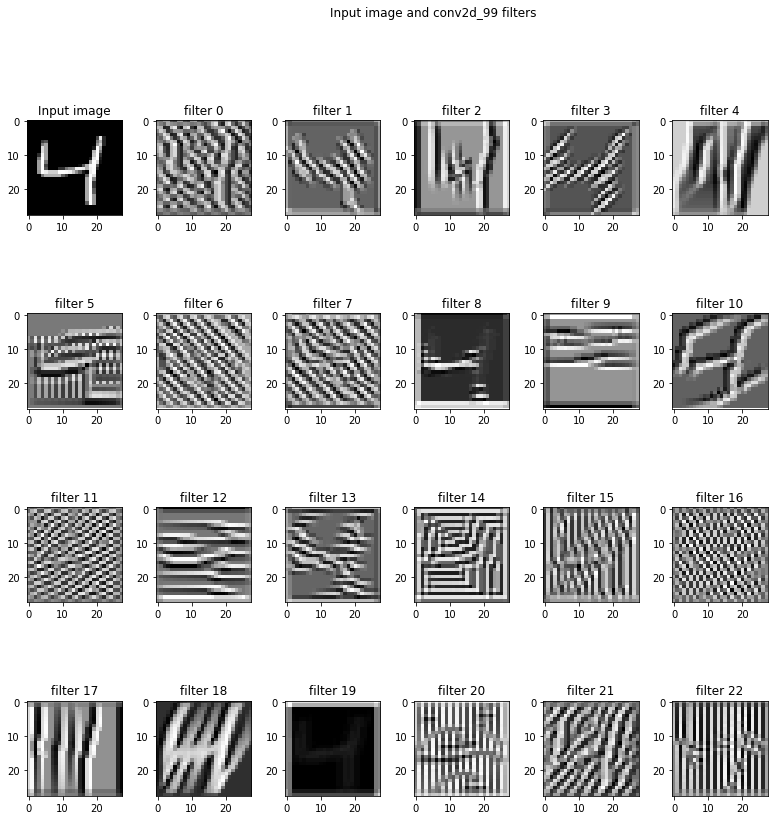

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_99'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()